# Analyze successful runs by classifier

## Import modules

In [38]:
import openml
import re
import numpy as np
import pandas as pd
import json
from collections import Counter
from matplotlib import pyplot as plt
from utils.functions_analyze_runs import get_best_classifiers, count_classifiers, task_to_runs
from utils.functions_analyze_runs import get_run_info_svc, get_run_info, svc_param_test, svc_param_test_local

# set api key
openml.config.apikey = open('.key', 'r').readline().strip('\n')


In [39]:
import importlib
import utils.functions_analyze_runs
importlib.reload(utils.functions_analyze_runs)

<module 'utils.functions_analyze_runs' from '/Users/hp2500/Google Drive/STUDY/Columbia/Research/dabl_final/utils/functions_analyze_runs.py'>

## Identify best runs

In [ ]:
# get all supervised classification tasks
tasks_all = openml.tasks.list_tasks(task_type_id=1, output_format='dataframe', tag = 'OpenML-CC18')
tasks_temp = tasks_all[0:5]
tasks_temp

In [ ]:
dict_runs_before = utils.functions_analyze_runs.get_best_classifiers(tasks_all,
                                                              evaluation_metric='area_under_roc_curve',
                                                              cutoff_best=5,
                                                              keep_duplicates=True,
                                                             cutoff_date='2019-06-01 00:00:00')
                                                             

In [ ]:
# extract well-performing flows from tasks
dict_runs = get_best_classifiers(tasks_all,
                           evaluation_metric='area_under_roc_curve',
                           cutoff_best=5,
                           keep_duplicates=True)

In [14]:
# save dict to file
file = open('dict_runs_duplicates.txt', 'w')
file.write(str(dict_runs))
file.close()

## Analyze data

### Collect values from dicts

In [15]:
# initialize empty df to count runs and flows
df_nr_flows_runs_before = pd.DataFrame(columns = ['task_id', 'nr_runs', 'nr_flows'])

# initialize empty list for all classifier names
list_clf_before = []

# iterate through dict
for key, value in dict_runs_before.items():
    
    df_nr_flows_runs_before.loc[len(df_nr_flows_runs_before)] = [key, value['nr_runs'],value['nr_flows']]
    # print(key, value['nr_runs'], value['nr_flows'])
    
    for k in value['run_data'].items():
        # print(k[1]['clf_name'])

        list_clf_before.append(k[1]['clf_name'])

df_nr_flows_runs_before = df_nr_flows_runs_before.set_index('task_id', drop = True)
df_nr_flows_runs_before

,nr_runs,nr_flows
task_id,,
3,35848,138
6,31198,127
11,19804,125
12,19733,118
14,19518,105
...,...,...
167121,40,9
167124,73,9
167125,1421,8


In [16]:
# initialize empty df to count runs and flows
df_nr_flows_runs = pd.DataFrame(columns = ['task_id', 'nr_runs', 'nr_flows'])

# initialize empty list for all classifier names
list_clf = []

# iterate through dict
for key, value in dict_runs.items():
    
    df_nr_flows_runs.loc[len(df_nr_flows_runs)] = [key, value['nr_runs'],value['nr_flows']]
    # print(key, value['nr_runs'], value['nr_flows'])
    
    for k in value['run_data'].items():
        # print(k[1]['clf_name'])

        list_clf.append(k[1]['clf_name'])




In [17]:
df_nr_flows_runs = df_nr_flows_runs.set_index('task_id', drop = True)
df_nr_flows_runs


,nr_runs,nr_flows
task_id,,
3,35848,138
6,31198,127
11,19804,125
12,19733,118
14,19518,105
...,...,...
167121,40,9
167124,73,9
167125,1421,8


### Check distribution of nr_runs over tasks

Text(0.5, 0, 'CC18 Tasks')

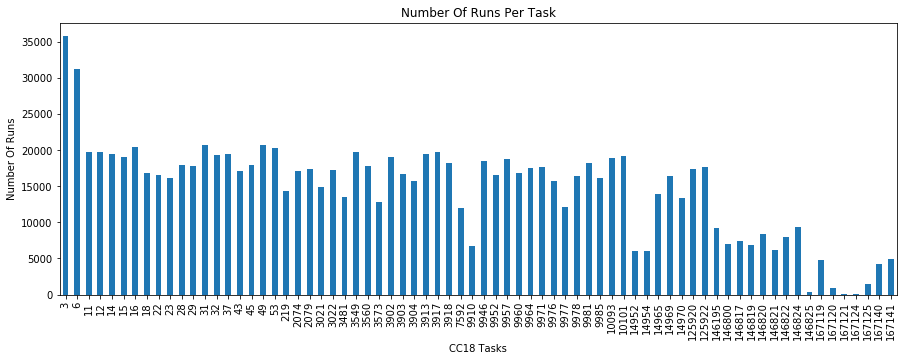

In [18]:
ax = df_nr_flows_runs_before.nr_runs.plot(kind = 'bar', figsize = (15,5))
ax.set_title('Number Of Runs Per Task')
ax.set_ylabel('Number Of Runs')
ax.set_xlabel('CC18 Tasks')

Text(0.5, 0, 'CC18 Tasks')

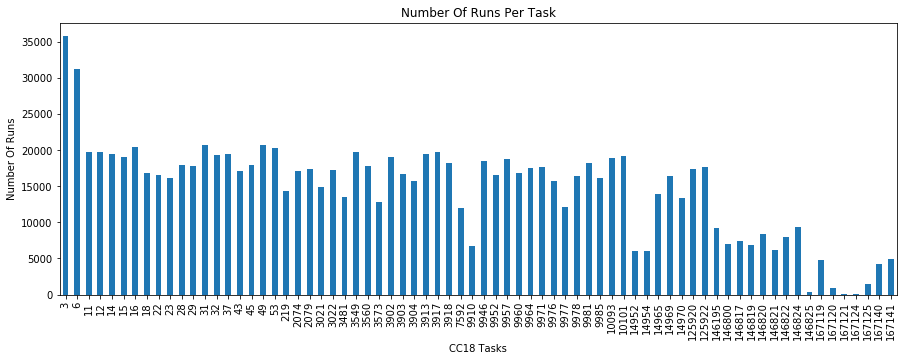

In [19]:
ax = df_nr_flows_runs.nr_runs.plot(kind = 'bar', figsize = (15,5))
ax.set_title('Number Of Runs Per Task')
ax.set_ylabel('Number Of Runs')
ax.set_xlabel('CC18 Tasks')

### Check distribution of nr_flows over tasks

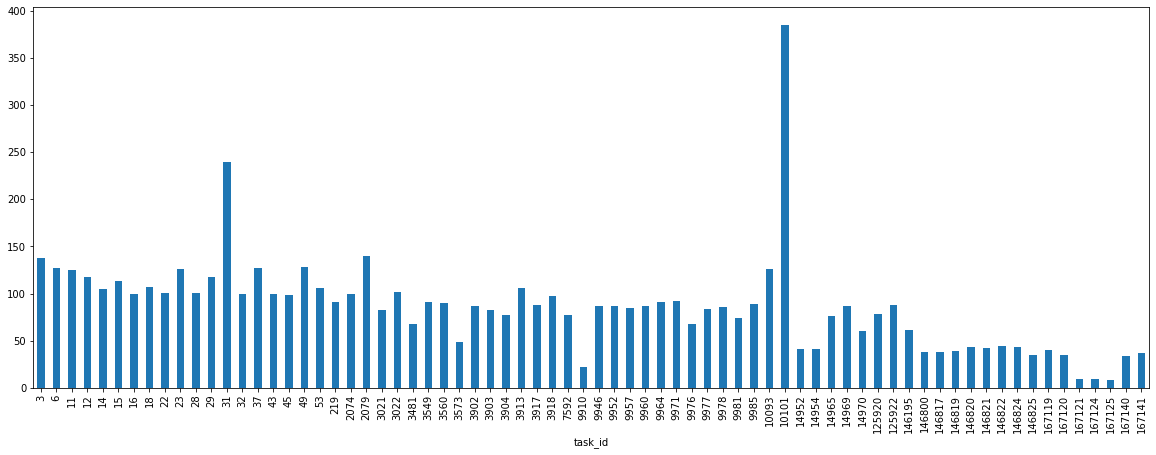

In [20]:
df_nr_flows_runs.nr_flows.plot(kind = 'bar', figsize = (20,7))

### Absolute frequencies of classifiers among top 5 over all tasks

In [21]:
# check absolute frequencies
Counter(list_clf_before)

Counter({'HistGradientBoostingClassifier': 119,
         'SVC': 124,
         'GradientBoostingClassifier': 6,
         'RandomForestClassifier': 67,
         'ExtraTreesClassifier': 1,
         'AdaBoostClassifier': 27,
         'KerasClassifier': 3,
         'LogisticRegression': 5,
         'MLPClassifier': 5,
         'FKCEigenPro': 2})

In [22]:
# check absolute frequencies
Counter(list_clf)


Counter({'HistGradientBoostingClassifier': 119,
         'SVC': 124,
         'GradientBoostingClassifier': 6,
         'RandomForestClassifier': 67,
         'ExtraTreesClassifier': 1,
         'AdaBoostClassifier': 27,
         'KerasClassifier': 3,
         'LogisticRegression': 5,
         'MLPClassifier': 5,
         'FKCEigenPro': 2})

In [23]:
pd.Series(list_clf_before).value_counts(normalize = True).keys()

Index(['SVC', 'HistGradientBoostingClassifier', 'RandomForestClassifier',
       'AdaBoostClassifier', 'GradientBoostingClassifier',
       'LogisticRegression', 'MLPClassifier', 'KerasClassifier', 'FKCEigenPro',
       'ExtraTreesClassifier'],
      dtype='object')

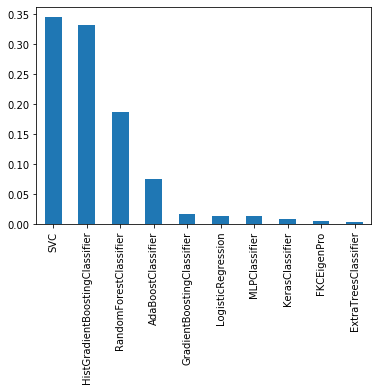

In [24]:
pd.Series(list_clf).value_counts(normalize = True).plot(kind = 'bar')

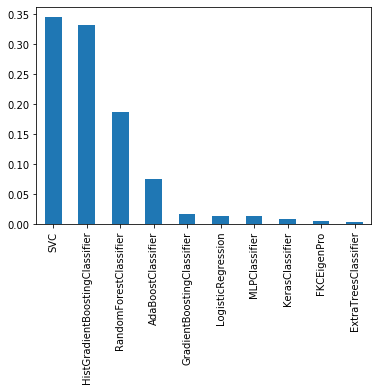

In [25]:
pd.Series(list_clf_before).value_counts(normalize = True).plot(kind = 'bar')

In [26]:
list(range(1, len(heights+1)))

NameError: name 'heights' is not defined

Text(0.5, 1.0, 'After HGB Experiments')

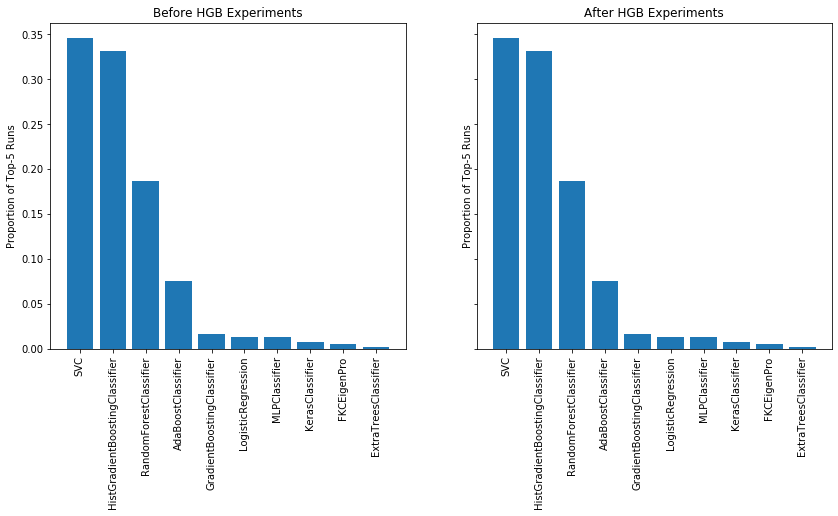

In [27]:
# check distributions of personality scores over clusters
fig, ax = plt.subplots(1, 2, figsize = (14,6), sharex='col', sharey='row')

# plot absolute frequencies before
heights = pd.Series(list_clf_before).value_counts(normalize = True)

ax[0].bar(x = list(range(len(heights))), height = heights)
ax[0].set_xticks(list(range(len(heights))))
ax[0].set_xticklabels(heights.index, rotation = 90)
ax[0].set_ylabel('Proportion of Top-5 Runs')
ax[0].set_title('Before HGB Experiments')

# plot absolute frequencies before
heights = pd.Series(list_clf).value_counts(normalize = True)
ax[1].set_xticks(list(range(len(heights))))
ax[1].bar(x = list(range(len(heights))), height = heights)
ax[1].set_xticklabels(heights.index, rotation = 90)
ax[1].set_ylabel('Proportion of Top-5 Runs')
ax[1].set_title('After HGB Experiments')


Text(0.5, 1.0, 'Proportions Of Top-5 Runs Of Different Classifiers')

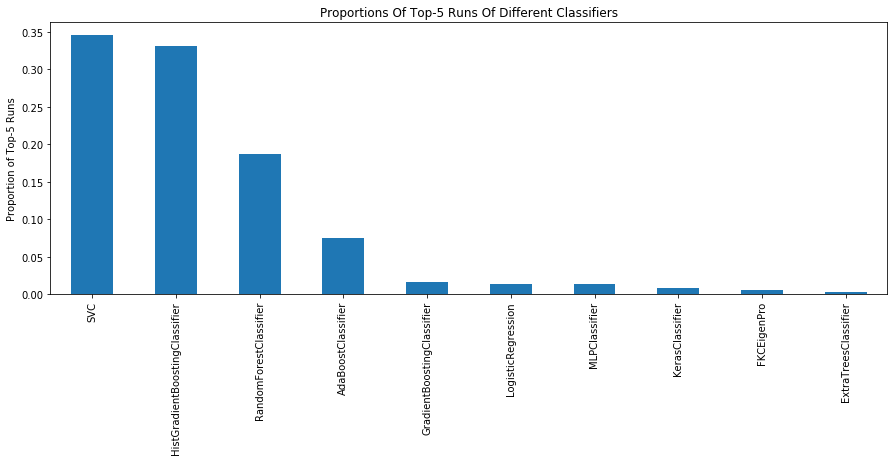

In [28]:
# plot absolute frequencies
ax = pd.Series(list_clf).value_counts(normalize = True).plot(kind='bar', figsize = (15,5))
ax.set_ylabel('Proportion of Top-5 Runs')
ax.set_title('Proportions Of Top-5 Runs Of Different Classifiers')



### Check overall number of runs for each classifier

In [ ]:
baserates = count_classifiers(tasks_all, keep_duplicates = True)

In [ ]:
file = open('baserates.txt', 'w')
file.write(str(baserates))
file.close()

In [ ]:
list_baserates = list(baserates.clf_name)

In [ ]:
Counter(list_baserates)

In [ ]:
# plot frequencies
baserates.clf_name.value_counts().plot(kind='bar', figsize = (20,10))


In [ ]:
# drop classifiers that never were among the top 5
set_best = set(list_clf)
baserates_clean = [x for x in list_baserates if x in set_best]

In [ ]:
# check frequencies
Counter(baserates_clean)


In [ ]:
# plot frequencies
pd.Series(baserates_clean).value_counts().plot(kind='bar', figsize = (20,10))


### Check proportion of successful runs relative to overall number of runs per classifier

In [ ]:
Counter(baserates_clean)

In [ ]:
Counter(list_clf)

In [ ]:
# define function to calculate 
def rel_freq_dict(d1, d2):
    for key, value in d1.items():
        d1[key] = value / d2.get(key, 0)
    return dict(d1)

In [ ]:
# correct for baserates
rel_freq = rel_freq_dict(Counter(list_clf), Counter(baserates_clean))
rel_freq

In [ ]:
# sort values
pd.Series(rel_freq).sort_values(ascending = False)

In [ ]:
# plot
pd.Series(rel_freq).sort_values(ascending = False).plot(kind='bar', figsize = (20, 10))


### After dropping tasks with very few runs/flows

In [ ]:
# transform dict to list

# initialize empty df to count runs and flows
df_nr_flows_runs = pd.DataFrame(columns = ['task_id', 'nr_runs', 'nr_flows'])

# initialize empty list for all classifier names
list_clf = []

# iterate through dict
for key, value in dict_runs.items():
    
    if value['nr_runs'] > 1000:
        df_nr_flows_runs.loc[len(df_nr_flows_runs)] = [key, value['nr_runs'],value['nr_flows']]
        #print(key, value['nr_runs'], value['nr_flows'])
        for k in value['run_data'].items():
            #print(k[1]['clf_name'])

            #print(k[0])
            #print(k[1])
            list_clf.append(k[1]['clf_name'])


In [ ]:
df_nr_flows_runs.head()

In [ ]:
baserates

In [ ]:
temp = df_nr_flows_runs.loc[df_nr_flows_runs.nr_runs > 10000].task_id

In [ ]:
baserates_clean = baserates.loc[baserates.task_id.isin(temp)]

In [ ]:
Counter(baserates_clean.clf_name)

In [ ]:
# drop classifiers that never performed well
set_best = set(list_clf)
baserates_clean = [x for x in list_baserates if x in set_best]

In [ ]:
cbr = dict(Counter(list_baserates))
cbr_new = []
for i in cbr.items():
    if i[1] > 20:
        cbr_new.append(i[0])

In [ ]:
# drop classifiers that dont occur often enough
set_n = set(cbr_new)
baserates_clean = [x for x in baserates_clean if x in set_n]
clf_clean = [x for x in list_clf if x in set_n]

In [ ]:
# plot absolute frequencies
pd.Series(clf_clean).value_counts().plot(kind='bar', figsize = (20,10))

In [ ]:
# correct for baserates
rel_freq = rel_freq_dict(Counter(clf_clean), Counter(baserates_clean))
rel_freq

In [ ]:
# plot
pd.Series(rel_freq).sort_values(ascending = False).plot(kind='bar', figsize = (20, 10))

### Get SVC flows 

In [ ]:
dict_runs

In [30]:
# transform dict to list

# initialize empty list for all classifier names
list_svc_runs = []

# iterate through dict
for key, value in dict_runs.items():
    
    print(key, '', end = '')
    
    for k in value['run_data'].items():
        if k[1]['clf_name'] == 'SVC':
            list_svc_runs.append(k[0])


3 6 11 12 14 15 16 18 22 23 28 29 31 32 37 43 45 49 53 219 2074 2079 3021 3022 3481 3549 3560 3573 3902 3903 3904 3913 3917 3918 7592 9910 9946 9952 9957 9960 9964 9971 9976 9977 9978 9981 9985 10093 10101 14952 14954 14965 14969 14970 125920 125922 146195 146800 146817 146819 146820 146821 146822 146824 146825 167119 167120 167121 167124 167125 167140 167141 

In [31]:
len(list_svc_runs)

124

In [32]:
list_svc_flows = []

for i in list_svc_runs:
    run = openml.runs.get_run(i)
    list_svc_flows.append(run.flow_id)
    

In [33]:
list(set(list_svc_flows))

[6952, 6954, 8330, 8317, 16374, 16345, 7707, 6269, 5983]

In [ ]:
for i in list(set(list_svc_flows)):
    flow = openml.flows.get_flow(i)
    print(i)
    print(flow.name)
    print()

# Get RF Flows 

In [34]:
# transform dict to list

# initialize empty list for all classifier names
list_rf_runs = []

# iterate through dict
for key, value in dict_runs.items():
    
    print(key, '', end = '')
    
    for k in value['run_data'].items():
        if k[1]['clf_name'] == 'RandomForestClassifier':
            list_rf_runs.append(k[0])


3 6 11 12 14 15 16 18 22 23 28 29 31 32 37 43 45 49 53 219 2074 2079 3021 3022 3481 3549 3560 3573 3902 3903 3904 3913 3917 3918 7592 9910 9946 9952 9957 9960 9964 9971 9976 9977 9978 9981 9985 10093 10101 14952 14954 14965 14969 14970 125920 125922 146195 146800 146817 146819 146820 146821 146822 146824 146825 167119 167120 167121 167124 167125 167140 167141 

In [35]:
list_rf_flows = []

for i in list_rf_runs:
    run = openml.runs.get_run(i)
    list_rf_flows.append(run.flow_id)
    

In [36]:
list(set(list_rf_flows))

[5804, 8365, 5909, 8918, 6969, 8315, 8351]

# Compare bot runs to new runs

In [ ]:
x = task_to_runs(11)

In [ ]:
x.flow_name.iloc[1]

In [ ]:
x

In [ ]:
params = get_run_info(6058985)
params

In [ ]:
params = get_run_info_svc(6058985)
params

## Original setup

In [ ]:
params_0 = {'C': 5.3824120488001554,
          'cache_size': 200,
          'coef0': 0.0,
          'degree': 3,
          'gamma': 0.06797377929157812,
          'kernel': "rbf",
          'max_iter': -1,
          'probability': True,
          'random_state': 18122,
          'shrinking': False,
          'tol': 1.220351186258478e-05,
          'verbose': False}

run_params_0 = svc_param_test(6, 6058985, params_0)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_0.run_id])

## Parameters that were used

In [ ]:
params_1 = {'C': 5.3824120488001554,
          'coef0': 0.0,
          'degree': 3,
          'gamma': 0.06797377929157812,
          'kernel': 'rbf',
          'max_iter': -1,
          'random_state': 1}

run_params_1 = svc_param_test(6, 6058985, params_1)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_1.run_id])

## Try original random seed

In [ ]:
params_2 = {'C': 5.3824120488001554,
          'coef0': 0.0,
          'degree': 3,
          'gamma': 0.06797377929157812,
          'kernel': 'rbf',
          'max_iter': -1,
          'random_state': 18122}

run_params_2 = svc_param_test(6, 6058985, params_2)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_2.run_id])

## Drop parameters from original setup

In [ ]:
params_3 = {'C': 5.3824120488001554,
          'cache_size': 200,
          'coef0': 0.0,
          'degree': 3,
          'gamma': 0.06797377929157812,
          'kernel': "rbf",
          'max_iter': -1,
          'probability': True,
          'random_state': 1,
          'shrinking': False,
          #'tol': 1.220351186258478e-05,
          'verbose': False}

run_params_3 = svc_param_test(6, 6058985, params_3)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_3.run_id])

In [ ]:
params_4 = {'C': 5.3824120488001554,
          'cache_size': 200,
          'coef0': 0.0,
          'degree': 3,
          'gamma': 0.06797377929157812,
          'kernel': "rbf",
          'max_iter': -1,
          'probability': True,
          'random_state': 1,
          #'shrinking': False,
          #'tol': 1.220351186258478e-05,
          'verbose': False}

run_params_4 = svc_param_test(6, 6058985, params_4)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_4.run_id])

In [ ]:
params_5 = {'C': 5.3824120488001554,
          #'cache_size': 200,
          'coef0': 0.0,
          'degree': 3,
          'gamma': 0.06797377929157812,
          'kernel': "rbf",
          'max_iter': -1,
          'probability': True,
          'random_state': 1,
          #'shrinking': False,
          #'tol': 1.220351186258478e-05,
          'verbose': False}

run_params_5 = svc_param_test(6, 6058985, params_5)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_5.run_id])

In [ ]:
params_6 = {'C': 5.3824120488001554,
          #'cache_size': 200,
          'coef0': 0.0,
          'degree': 3,
          'gamma': 0.06797377929157812,
          'kernel': "rbf",
          'max_iter': -1,
          #'probability': True,
          'random_state': 1,
          #'shrinking': False,
          #'tol': 1.220351186258478e-05,
          'verbose': False}

run_params_6 = svc_param_test(6, 6058985, params_6)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_6.run_id])

In [ ]:
params_7 = {'C': 5.3824120488001554,
          'cache_size': 200,
          'coef0': 0.0,
          'degree': 3,
          'gamma': 0.06797377929157812,
          'kernel': "rbf",
          'max_iter': -1,
          #'probability': True,
          'random_state': 1,
          'shrinking': False,
          'tol': 1.220351186258478e-05,
          'verbose': False}

run_params_7 = svc_param_test(6, 6058985, params_7)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_7.run_id])

In [ ]:
get_run_info(5919852)

In [ ]:
params_8 = {'C': 22461.119025907585,
         'coef0': -0.5424800953743301,
         'degree': 2,
         'gamma': 4.147016444636446,
         'kernel': 'poly',
         'max_iter': -1,
         'random_state': 1}

run_params_8 = svc_param_test(6, 6058985, params_8)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_8.run_id])

# Check another task 

In [ ]:
params_9 = {'C': 22461.119025907585,
         'coef0': -0.5424800953743301,
         'degree': 2,
         'gamma': 4.147016444636446,
         'kernel': 'poly',
         'probability': True,
         'max_iter': -1,
         'random_state': 1}

run_params_9 = svc_param_test(6, 6058985, params_9)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_9.run_id])

In [ ]:
params_10 = {'C': 22461.119025907585,
         'coef0': -0.5424800953743301,
         'degree': 2,
         'gamma': 4.147016444636446,
         'kernel': 'poly',
         'max_iter': -1,
         'random_state': 1}

run_params_10 = svc_param_test(11, 5919852, params_10)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_10.run_id])

In [ ]:
params_11 = {'C': 22461.119025907585,
         'coef0': -0.5424800953743301,
         'degree': 2,
         'gamma': 4.147016444636446,
         'kernel': 'poly',
         'probability': True,
         'max_iter': -1,
         'random_state': 1}

run_params_11 = svc_param_test(11, 5919852, params_11)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_11.run_id])

In [ ]:
test_run = openml.runs.get_run(10413201)

In [ ]:
vars(test_run)

In [ ]:
test_run.fold_evaluations

In [ ]:
test_task = openml.tasks.get_task(15)

In [ ]:
vars(test_task)

## Try locally on task 3

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.metrics import roc_auc_score

In [ ]:
# get task
task = openml.tasks.get_task(3)

# get dataset object 
data = openml.datasets.get_dataset(task.dataset_id)

# get relevant info from dataset object
X, y, categorical_indicator, attribute_names = data.get_data(dataset_format='array',
                                                            target=data.default_target_attribute)

In [ ]:
svc = SVC(**params_5)
cross_val_score(svc, X = X, y = y, scoring = 'roc_auc', cv = 2)


In [ ]:
svc = SVC(**params_7)
cross_val_score(svc, X = X, y = y, scoring = 'roc_auc', cv = 2)

In [ ]:
X, y = datasets.load_breast_cancer(return_X_y=True)
svc = SVC(**params_5)
cross_val_score(svc, X = X, y = y, scoring = 'roc_auc', cv = 2)

In [ ]:
X, y = datasets.load_breast_cancer(return_X_y=True)
svc = SVC(**params_7)
cross_val_score(svc, X = X, y = y, scoring = 'roc_auc', cv = 2)

## Try locally on task 15

In [ ]:
params_20 = {'C': 22461.119025907585,
         'coef0': -0.5424800953743301,
         'degree': 2,
         'gamma': 4.147016444636446,
         'kernel': 'poly',
         'probability': False,
         'max_iter': -1,
         'random_state': 1}

run_cv_params_20 = svc_param_test_local(15, params_20, 10)

np.mean(run_cv_params_20)

In [ ]:
run_cv_params_20

In [ ]:
params_20 = {'C': 22461.119025907585,
         'coef0': -0.5424800953743301,
         'degree': 2,
         'gamma': 4.147016444636446,
         'kernel': 'poly',
         'probability': True,
         'max_iter': -1,
         'random_state': 1}

run_cv_params_20 = svc_param_test_local(15, params_20, 10)
np.mean(run_cv_params_20)

In [ ]:
params_21 = {'C': 22461.119025907585,
         'coef0': -0.5424800953743301,
         'degree': 2,
         'gamma': 4.147016444636446,
         'kernel': 'poly',
         'probability': False,
         'max_iter': -1,
         'random_state': 1}

run_cv_params_21 = svc_param_test_local(15, params_21, 10)
np.mean(run_cv_params_21)

In [ ]:
params_22 = {'C': 22461.119025907585,
         'coef0': -0.5424800953743301,
         'degree': 2,
         'gamma': 4.147016444636446,
         'kernel': 'poly',
         'probability': False,
         'max_iter': -1,
         'random_state': 1}

run_params_22 = svc_param_test(15, 6148258, params_22)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_22.run_id])

In [ ]:
params_23 = {'C': 22461.119025907585,
         'coef0': -0.5424800953743301,
         'degree': 2,
         'gamma': 4.147016444636446,
         'kernel': 'poly',
         'probability': True,
         'max_iter': -1,
         'random_state': 1}

run_params_23 = svc_param_test(15, 6148258, params_23)

In [ ]:
openml.evaluations.list_evaluations('area_under_roc_curve', id = [run_params_23.run_id])

In [ ]:
test_task = openml.tasks.get_task(15)


In [ ]:
split = test_task.download_split()

In [ ]:
split = split.split[0]

In [ ]:
split

In [ ]:
test_task.estimation_procedure


In [ ]:
params_20 = {'C': 22461.119025907585,
         'coef0': -0.5424800953743301,
         'degree': 2,
         'gamma': 4.147016444636446,
         'kernel': 'poly',
         'probability': True,
         'max_iter': -1,
         'random_state': 1}

run_cv_params_20 = svc_param_test_local(15, params_20, split)
np.mean(run_cv_params_20)

In [ ]:
'https://www.openml.org/api_splits/get/15/Task_15_splits.arff'

In [ ]:
# predictions

